# Descripción del proyecto

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

## Paso 4. Análisis exploratorio de datos (Python)

Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:

/datasets/project_sql_result_01.csv. Contiene los siguientes datos:

- company_name: nombre de la empresa de taxis
- trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

/datasets/project_sql_result_04.csv. Contiene los siguientes datos:

- dropoff_location_name: barrios de Chicago donde finalizaron los viajes
- average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

/datasets/project_sql_result_07.csv: el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:

- start_ts: fecha y hora de recogida
- weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
- duration_seconds: duración del viaje en segundos


Para estos dos datasets ahora necesitas:

- importar los archivos
- estudiar los datos que contienen
- asegurarte de que los tipos de datos sean correctos
- identificar los 10 principales barrios en términos de finalización
- hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
- sacar conclusiones basadas en cada gráfico y explicar los resultados

## Preparación de los datos

In [118]:
## Importe de librerías a usar en el desarrollo del proyecto:

import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from scipy import stats as st


In [119]:
#Lectura del dataset como fuente de datos y creación del DataFrame a desarrollar:

df_company_trips = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/project_sql_result_01.csv') #---> Primer dataset

df_dropoffs = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/project_sql_result_04.csv') #---> Segundo dataset

df_loop_to_airport = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/project_sql_result_07.csv') #---> Tercer dataset


In [120]:
#Revisión general de la información:

#Revisión del primer dataframe: 
display(df_company_trips.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None

In [121]:
display(df_company_trips.sample(30))

,company_name,trips_amount
13,Nova Taxi Affiliation Llc,3175
4,Taxi Affiliation Service Yellow,9299
17,Chicago Medallion Management,1955
1,Taxi Affiliation Services,11422
57,Metro Group,11
40,6574 - Babylon Express Inc.,31
39,0118 - 42111 Godfrey S. Awir,33
25,Top Cab Affiliation,978
35,6742 - 83735 Tasha Ride Inc,39
59,4053 - 40193 Adwar H. Nikola,7


In [122]:
df_company_trips.describe(include = 'all')

,company_name,trips_amount
count,64,64.000000
unique,64,NaN
top,Flash Cab,NaN
freq,1,NaN
mean,NaN,2145.484375
std,NaN,3812.310186
min,NaN,2.000000
25%,NaN,20.750000
50%,NaN,178.500000
75%,NaN,2106.500000


In [123]:
#Revisión del segundo dataframe

display(df_dropoffs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

In [124]:
display(df_dropoffs.sample(30))

,dropoff_location_name,average_trips
74,Beverly,10.500000
5,Lake View,2420.966667
23,Rogers Park,299.033333
69,Roseland,14.366667
40,Bucktown,74.300000
46,Chinatown,52.433333
68,Clearing,14.500000
38,Armour Square,77.033333
62,Brighton Park,19.466667
9,Sheffield & DePaul,1259.766667


In [125]:
df_dropoffs.describe(include = 'all')

,dropoff_location_name,average_trips
count,94,94.000000
unique,94,NaN
top,Loop,NaN
freq,1,NaN
mean,NaN,599.953728
std,NaN,1714.591098
min,NaN,1.800000
25%,NaN,14.266667
50%,NaN,52.016667
75%,NaN,298.858333


In [126]:
# Revisión del tercer dataframe:

df_loop_to_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [127]:
df_loop_to_airport.sample(30)

,start_ts,weather_conditions,duration_seconds
609,2017-11-11 07:00:00,Good,1243.0
388,2017-11-18 10:00:00,Bad,1610.0
45,2017-11-04 09:00:00,Good,1683.0
42,2017-11-04 06:00:00,Good,1440.0
812,2017-11-18 12:00:00,Bad,2467.0
442,2017-11-11 08:00:00,Good,1205.0
4,2017-11-11 07:00:00,Good,1440.0
883,2017-11-04 08:00:00,Good,1690.0
333,2017-11-11 06:00:00,Good,1260.0
861,2017-11-04 16:00:00,Bad,2760.0


In [128]:
df_loop_to_airport.describe(include= 'all')

,start_ts,weather_conditions,duration_seconds
count,1068,1068,1068.000000
unique,81,2,NaN
top,2017-11-11 10:00:00,Good,NaN
freq,48,888,NaN
mean,NaN,NaN,2071.731273
std,NaN,NaN,769.461125
min,NaN,NaN,0.000000
25%,NaN,NaN,1438.250000
50%,NaN,NaN,1980.000000
75%,NaN,NaN,2580.000000


### Revisión preliminar de los datos:

A través de la revisión inicial de la información podemos obtener lo siguiente:

1. Ninguno de los tres dataframes contiene datos vacíos.
2. El tipo de datos correspondientes al Dataframe df_company_trips están correctos.
3. El tipo de datos correspondientes al Dataframe df_dropoffs están correctos.
4. El tipo de datos correspondientes al Dataframe df_loop_to_airport están correctos.
5. Cada dataset consta de columnas que contienen el formato snake_case y están en formato lower.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buena exploracion inicial.</div>




### Consideraciones preliminares:

1. Se revisarán los casos de datos duplicados en todo el dataset, como en las columnas de características cualitativas, como lo son 'company_name' en el Dataframe df_company_trips, como 'dropoff_location_name' en el Dataframe df_dropoffs


In [129]:
#Revisión datos nulos en df_company_trips:

df_company_trips_null_all = df_company_trips.isnull().sum()

display(df_company_trips_null_all)

company_name    0
trips_amount    0
dtype: int64

In [130]:
#Revisión datos nulos en la primera columna de df_company_trips:

df_company_trips_null_company_name = df_company_trips['company_name'].isnull().sum()

display(df_company_trips_null_company_name)

0

In [131]:
#Revisión datos duplicados en df_company_trips:

df_company_trips_duplicated_all = df_company_trips.duplicated().sum()

display(df_company_trips_duplicated_all)

0

In [132]:
#Revisión datos duplicados en la primera columna de df_company_trips:

df_company_trips_duplicated_company_name = df_company_trips['company_name'].duplicated().sum()

display(df_company_trips_duplicated_company_name)

0

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Verifica si existen duplicados ya que aqui solo estas viendo si hay nulos. </div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Hola Ezequiel, muchas gracias por tus comentarios y la revisión. Me confundí a la hora de colocar el código y puse isnull() en vez de duplicated(). Quedó corregido.
</div>


In [133]:
#Revisión datos nulos en df_dropoffs:

df_dropoffs_null_all = df_dropoffs.isnull().sum()

display(df_dropoffs_null_all)

dropoff_location_name    0
average_trips            0
dtype: int64

In [134]:
#Revisión datos nulos en la primera columna de df_dropoffs:

df_dropoffs_null_dropoff_location_name = df_dropoffs['dropoff_location_name'].isnull().sum()

display(df_dropoffs_null_dropoff_location_name)

0

In [135]:
#Revisión datos duplicados en df_dropoffs:

df_dropoffs_duplicated_all = df_dropoffs.duplicated().sum()

display(df_dropoffs_duplicated_all)

0

In [136]:
#Revisión datos duplicados en la primera columna de df_dropoffs:

df_dropoffs_duplicated_dropoff_location_name = df_dropoffs['dropoff_location_name'].duplicated().sum()

display(df_dropoffs_duplicated_dropoff_location_name)

0

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Verifica si existen duplicados ya que aqui solo estas viendo si hay nulos. </div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Me confundí a la hora de colocar el código y puse isnull() en vez de duplicated(). Quedó corregido.
</div>


In [137]:
#Revisión datos nulos en df_loop_to_airport:

df_to_airport_null_all = df_loop_to_airport.isnull().sum()

display(df_to_airport_null_all)

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [138]:
#Revisión datos duplicados en df_loop_to_airport:

df_to_airport_duplicated_all = df_loop_to_airport.duplicated().sum()

display(df_to_airport_duplicated_all)

197

Existen 197 datos duplicados en el Dataframe df_loop_to_airport. Dado el hecho que los 3 datos coincidan es muy poco probable (hora de salida, condiciones de clima y duración) es posible que los datos se hayan duplicado durante la carga de la información.
Es por ello que sólo se usarán aquellos registros que no estén duplicados. Es decir 871 de los 1068 originales. Se reasignará al dataframe original los registros sin datos duplicados.

In [139]:
df_loop_to_airport = df_loop_to_airport.drop_duplicates()

df_loop_to_airport

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1060,2017-11-04 14:00:00,Good,2700.0
1061,2017-11-18 16:00:00,Bad,2186.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Verifica si existen duplicados ya que aqui solo estas viendo si hay nulos. </div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Me confundí a la hora de colocar el código y puse isnull() en vez de duplicated(). Quedó corregido.
</div>

## Identificar los 10 principales barrios en términos de finalización

In [140]:
#Se revisan el Top 10 por promedio de viajes por barrios:

top_10_dropoff_nbh =  df_dropoffs.nlargest(10, 'average_trips')

display(top_10_dropoff_nbh)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


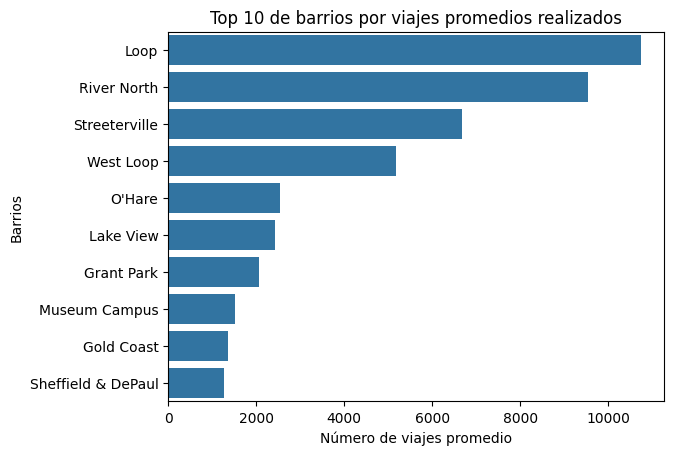

In [141]:
#Gráfico de top 10 de barrios por viajes promedios realizados:

sns.barplot(data = top_10_dropoff_nbh, x = top_10_dropoff_nbh['average_trips'], y = top_10_dropoff_nbh['dropoff_location_name'])
plt.xlabel('Número de viajes promedio')
plt.ylabel('Barrios')
plt.title('Top 10 de barrios por viajes promedios realizados')


plt.show()

Como se ve claramente, el barrio Loop es quien lidera el total de llegadas promedio con 10727 viajes realizados.

## Empresas de taxis y número de viajes

In [142]:
#Ahora realizaremos un top 20 de empresas de taxis que lideren los viajes realizados

top_20_taxi_trips = df_company_trips.nlargest(20,'trips_amount')

display(top_20_taxi_trips)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


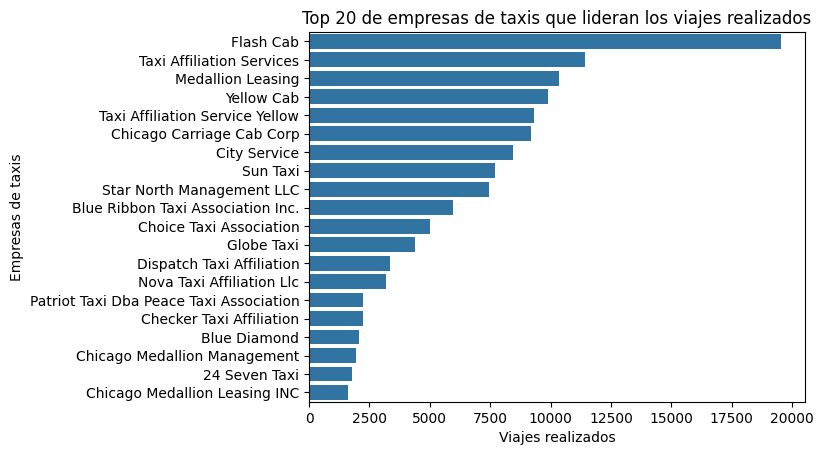

In [143]:
sns.barplot(data = top_20_taxi_trips, x = top_20_taxi_trips['trips_amount'], y = top_20_taxi_trips['company_name'])
plt.xlabel('Viajes realizados')
plt.ylabel('Empresas de taxis')
plt.title('Top 20 de empresas de taxis que lideran los viajes realizados')

plt.show()

La empresa que lidera muy por encima de todos es Flash Cab con 19558 viajes realizados.

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien la produccion. </div>

## Prueba de Hipótesis

Prueba la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Establece el valor del nivel de significación (alfa) por tu cuenta.

Explica:

- cómo planteaste las hipótesis nula y alternativa
- qué criterio usaste para probar las hipótesis y por qué

### Aclaraciones antes de establecer la hipótesis:

Hay que recordar que los días lluviosos/tormentosos ('rain' y 'storm') fueron catalogados como 'Bad' mientras que el resto de días fueron catalogados como 'Good' durante el proceso de análisis de los datos con SQL en la tabla 'weather_records'.

### Planteamiento de Hipótesis nula y alternativa:

La hipótesis a probar establece que: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Dado que la hipótesis a probar muestra cambios respecto de una muestra poblacional respecto a otra, esta hipótesis a probar tiene características propias de una hipótesis alternativa.

Es por ello que la Hipótesis Nula sería:

- H0 ---> avg_duration_good_days = avg_duration_bad_days

Por otro lado la Hipótesis Alternativa sería:
- H1 ---> avg_duration_good_days != avg_duration_bad_days

In [144]:
# Primero almacenaremos en 2 diferentes dataframes los días malos y los días buenos para posteriormente establecer la prueba de hipótesis estadística:

avg_duration_good_days = df_loop_to_airport[df_loop_to_airport['weather_conditions'] == 'Good']['duration_seconds']

avg_duration_bad_days = df_loop_to_airport[df_loop_to_airport['weather_conditions'] == 'Bad']['duration_seconds']

C:\Users\c_ort\AppData\Local\Temp\ipykernel_3584\1632362257.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "duration_seconds", y = "weather_conditions", data = df_loop_to_airport , palette= 'pastel', saturation = 0.9, linewidth = 1,


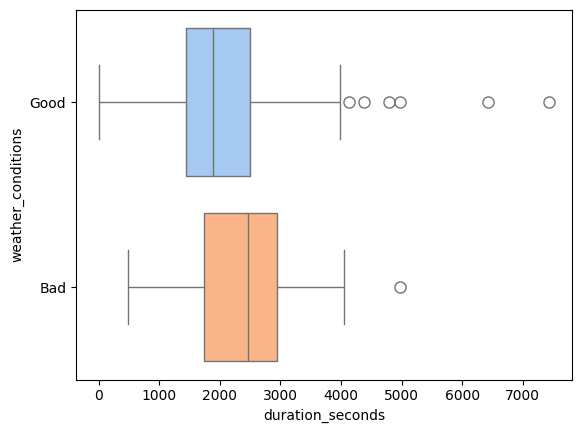

'Información de viajes en Good days: '

count     723.000000
mean     2032.253112
std       773.444860
min         0.000000
25%      1435.500000
50%      1883.000000
75%      2491.500000
max      7440.000000
Name: duration_seconds, dtype: float64

'Información de viajes en Bad days: '

count     148.000000
mean     2409.229730
std       751.544705
min       480.000000
25%      1746.000000
50%      2463.500000
75%      2940.000000
max      4980.000000
Name: duration_seconds, dtype: float64

In [145]:
#Ahora veremos la distribución de la duración de viajes de manera poblacional a través de diagramas de caja y bigotes para ambos grupos poblacionales:

sns.boxplot(x = "duration_seconds", y = "weather_conditions", data = df_loop_to_airport , palette= 'pastel', saturation = 0.9, linewidth = 1,
           fliersize = 8, order=['Good', 'Bad'])

plt.show()

display(f"Información de viajes en Good days: ", avg_duration_good_days.describe())
display(f"Información de viajes en Bad days: ", avg_duration_bad_days.describe())

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Se realizará el análisis estadístico sin tener en cuenta los datos atípicos en ambos grupos de datos. Para ello se definirá el rango IQR para cada grupo de datos y todo dato que esté fuera de ese rango será excluido.
</div>

In [146]:
#Teniendo en cuenta los datos estadísticos anteriores para Good days, se define el IQR:

#Inicialmente definimos Q1 y Q3:

good_days_Q1 = 1435.500000
good_days_Q3 = 2491.500000

#Ahora calculamos el IQR para good days y los límites que establecen los datos que queden fuera como outliers/atípicos:
IQR_good_days = good_days_Q3 - good_days_Q1 

Min_distance_IQR_good = good_days_Q1 - (1.5*IQR_good_days)  # ---> Límite menor del rango intercuartílico
Max_distance_IQR_good = good_days_Q3 + (1.5*IQR_good_days)  # ---> Límite mayor del rango intercuartílico

print(f"La menor distancia entre el rango intercuartil es de: {Min_distance_IQR_good}")
print(f"La mayor distancia entre el rango intercuartil es de: {Max_distance_IQR_good}")

La menor distancia entre el rango intercuartil es de: -148.5
La mayor distancia entre el rango intercuartil es de: 4075.5


In [147]:
#Teniendo en cuenta los datos estadísticos anteriores para Bad days, se define el IQR:

#Inicialmente definimos Q1 y Q3:

bad_days_Q1 = 1746.000000
bad_days_Q3 = 2940.000000

#Ahora calculamos el IQR para bad days y los límites que establecen los datos que queden fuera como outliers/atípicos:
IQR_bad_days = bad_days_Q3 - bad_days_Q1 

Min_distance_IQR_bad = bad_days_Q1 - (1.5*IQR_bad_days)  # ---> Límite menor del rango intercuartílico
Max_distance_IQR_bad = bad_days_Q3 + (1.5*IQR_bad_days)  # ---> Límite mayor del rango intercuartílico

print(f"La menor distancia entre el rango intercuartil es de: {Min_distance_IQR_bad}")
print(f"La mayor distancia entre el rango intercuartil es de: {Max_distance_IQR_bad}")

La menor distancia entre el rango intercuartil es de: -45.0
La mayor distancia entre el rango intercuartil es de: 4731.0


In [148]:
#Ahora usaremos un nuevo dataframe sin datos atípicos para ambos grupos de datos:

avg_duration_good_days_no_outliers = avg_duration_good_days[(avg_duration_good_days >= Min_distance_IQR_good) & (avg_duration_good_days <= Max_distance_IQR_good)]

display(avg_duration_good_days_no_outliers.head(10))
display(avg_duration_good_days_no_outliers.info())

0     2410.0
1     1920.0
2     1543.0
3     2512.0
4     1440.0
5     1320.0
7     2280.0
8     2460.0
9     2040.0
10    1500.0
Name: duration_seconds, dtype: float64

<class 'pandas.core.series.Series'>
Index: 717 entries, 0 to 1064
Series name: duration_seconds
Non-Null Count  Dtype  
--------------  -----  
717 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB


None

In [149]:
avg_duration_bad_days_no_outliers = avg_duration_bad_days[(avg_duration_bad_days >= Min_distance_IQR_bad) & (avg_duration_bad_days <= Max_distance_IQR_bad)]

display(avg_duration_bad_days_no_outliers.head(10))
display(avg_duration_bad_days_no_outliers.info())  

6     2969.0
30    1980.0
34    2460.0
51    2760.0
52    2460.0
54    1440.0
65    2363.0
70    3000.0
78    3120.0
92    1511.0
Name: duration_seconds, dtype: float64

<class 'pandas.core.series.Series'>
Index: 147 entries, 6 to 1067
Series name: duration_seconds
Non-Null Count  Dtype  
--------------  -----  
147 non-null    float64
dtypes: float64(1)
memory usage: 2.3 KB


None

In [150]:
#Ahora definiremos como hipótesis nula lo siguiente: "Las varianzas de ambas muestran son iguales" a través de la Levene Test:

alpha = 0.05

levene_test_variance_median = st.levene(avg_duration_good_days_no_outliers, avg_duration_bad_days_no_outliers, center ='median') # ---> Prueba para determinar si las varianzas son iguales según la Mediana

levene_test_variance_mean = st.levene(avg_duration_good_days_no_outliers, avg_duration_bad_days_no_outliers, center ='mean')  # ---> Prueba para determinar si las varianzas son iguales según la Media


if (levene_test_variance_median.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")
    
if (levene_test_variance_mean.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

No podemos rechazar la hipótesis nula
No podemos rechazar la hipótesis nula


Es importante resaltar que en la prueba anterior determinamos que No podemos rechazar el hecho que las varianzas poblacionales de avg_duration_good_days y avg_duration_bad_days sean iguales.

Es por ello que en la prueba de hipótesis siguiente asumiremos que las varianzas son iguales

In [151]:
#Ahora procederemos con las consideraciones estadísticas para realizar la prueba de hipótesis:

alpha = 0.05 # Nuestro alpha será de 0.05

#Almacenaremos el cálculo de la prueba t en results, considerando que las varianzas son muy similares, por ello
#usamos equal_var = True (valor default en ttest_ind). El método a utilizar es st.ttest_ind:

results = st.ttest_ind(avg_duration_good_days_no_outliers, avg_duration_bad_days_no_outliers) 

print('valor p:', results.pvalue) # Imprimimos el valor p obtenido
print()

if (results.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 2.3363796620667475e-09

Rechazamos la hipótesis nula


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Simplemente a modo de consejo, cuando realizamos este tipo de prueba, los outliers pueden modificarla. Por lo que generalmente se recomienda tratarlos antes  de realizar la prueba.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Se realizará el análisis estadístico sin tener en cuenta los datos atípicos en ambos grupos de datos. Para ello se crearon nuevos dataframes: avg_duration_good_days_no_outliers y avg_duration_bad_days_no_outliers
</div>

### Conclusión pruebas de hipótesis:

- Apoyándonos en las gráficas de caja y bigotes podemos observar de manera visual que la distribución de viajes en los días "buenos" tiene un comportamiento poblacional que se ubica en un rango de duración de tiempo de viajes menor a los días "malos"; teniendo como promedio de duración al aeropuerto de casi 2000 segundos (33 minutos), mientras que los días malos el promedio es superior con 2427 segundos (40 minutos y medio).
- La información de las gráficas se valida una vez realizados las pruebas de hipótesis: Se rechaza la hipótesis que la duración de los viajes es igual en los días buenos vs los malos. La prueba ttest arroja que poblacionalmente los viajes al aeropuerto durante los días "malos" son más duraderos.

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelentes conclusiones y prueba estadistica. </div>


## Conclusiones generales:

- La población más activa en Zuber está concentrada en los barrios: Loop quien lidera el listado con 10727 viajes, River North con 523 viajes y Streeterville con 6664 viajes.
- La empresa de taxis que más eligen los usuarios de Zuber es Flash Cab con más de 19500 viajes registrados.
- El clima afecta la duración de los viajes de Loop al aeropuerto (al menos durante los días sábados).

 1. A manera de mejora, sería recomendable crear una campaña de descuentos por número de viajes usados en Zuber. Lo mismo, establecer una estrategia de referidos para que nuevas personas se vinculen y utilicen la plataforma. Todo lo anterior con el fin de establecer un mejor posicionamiento en aquellas zonas donde la actividad de los viajes es menor, y aumentar el número de usuarios que usan Zuber.
 
 2. Por otro lado, se podría revisar el tipo de servicio que ofrecen las compañías líderes de taxis como Flash Cab para retroalimentar a aquellas compañías que menos actividad de viajes registran en la plataforma.

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buena conclusion general. </div>